In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import io

In [ ]:
from google.colab import files
uploaded = files.upload()
dfA = pd.read_csv(io.BytesIO(uploaded['country_profile_variables.csv']))
dfA

Saving country_profile_variables.csv to country_profile_variables (1).csv


,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population),Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)","Life expectancy at birth (females/males, years)","Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,23.3,53.3,61.6,10.0,28.5,8.6,19.3/83.6,125,125,1458,3568,-2110,-5121,3.2,26.7,4.0,5.3,63.5/61.0,43.2/4.1,382.4/1.2,1513.1,68.6,8.2,0.3,3.3,91.1/131.6,39.7/70.7,3.7/13.3,27.7,61.6,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,26.0,51.7,41.4,18.3,40.3,15.8,40.2/61.0,134,134,1962,4669,-2707,-1222,-0.1,57.4,2.2,1.7,79.9/75.6,17.4/19.0,57.6/2.0,8.8,14.6,5.9,1.3,3.5,111.7/115.5,92.5/98.8,68.1/48.7,22.9,106.4,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,37.3,50.5,10.8,34.5,54.7,11.4,17.0/70.7,160,161,29992,47091,-17099,-27229,2.0,70.7,2.8,3.0,76.5/74.1,29.3/9.4,242.4/0.6,99.8,27.7,7.2,...,...,112.7/119.5,101.7/98.1,45.1/28.9,31.6,113.0,38.2,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99
3,American Samoa,Polynesia,199,56,278.2,103.6,-99,-99,-99.0,-99,-99.0,-99.0,...,...,...,...,.../...,112,112,-99,-99,-99,-99,-~0.0,87.2,-0.1,2.6,77.8/71.1,33.3/9.0,23.2/41.8,-99,9.6,-99.0,-99,-99,-99,-99,-99,-99.0,...,-99,92,87.9,-99,-99,-99,100.0/100.0,62.5/62.5,-99,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,10.8,88.6,-99,-99,-99,-99,-99,-99,-99,100,1355,-1255,-99,-1.6,85.1,0.1,1.2,-99,14.4/19.0,42.1/59.7,-99,-99,8.1,3.7,3.3,-99,-99,-99,32.1,88.1,96.9,13,34.0,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Wallis and Futuna Islands,Polynesia,142,12,84.1,93.4,-99,-99,-99.0,-99,-99.0,-99.0,-99,-99,-99,-99,-99,115,115,1,53,-51,-99,-2.1,0.0,0.0,2.1,78.7/72.8,25.5/15.4,2.8/21.7,-99,...,-99.0,-99,-99,-99,-99,-99

##Question 1

In [ ]:
dfA[0:5][['country', 'Surface area (km2)']]

,country,Surface area (km2)
0,Afghanistan,652864
1,Albania,28748
2,Algeria,2381741
3,American Samoa,199
4,Andorra,468


##Question 2

In [ ]:
dfA[7:9]

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population),Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)","Life expectancy at birth (females/males, years)","Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
7,Antigua and Barbuda,Caribbean,442,102,231.8,92.3,1356,4.1,14764.5,1.9,18.3,79.8,...,...,...,...,.../...,88,88,61,491,-429,-204,1.1,23.8,-0.9,2.1,78.2/73.3,23.9/10.9,28.1/30.6,~0.0,9.1,5.5,-99,...,94.1/100.0,103.8/101.6,31.1/15.1,11.1,137.2,65.2,55,22.3,0.5/5.8,-99,84,97.9/97.9,91.4/91.4,0.12,-99
8,Argentina,SouthAmerica,2780400,44271,16.2,95.9,632343,2.4,14564.5,6.0,27.8,66.2,2.0,24.8,73.1,6.5,48.6/74.4,119,119,57733,55610,2124,-15944,1.0,91.8,1.0,2.3,79.8/72.2,24.9/15.4,2086.3/4.8,5.0,13.7,4.8,3.8,5.3,109.8/110.2,110.3/103.4,102.9/63.5,38.9,143.9,69.4,256,10.0,204.0/4.7,3167,85,99.0/100.0,96.2/98.3,0.01,-99


##Question 3

In [ ]:
dfA.loc[0:2, 'Region':'Population in thousands (2017)']

,Region,Surface area (km2),Population in thousands (2017)
0,SouthernAsia,652864,35530
1,SouthernEurope,28748,2930
2,NorthernAfrica,2381741,41318


##Question 4

In [ ]:
dfA.loc[:, 'Region'].unique()

array(['SouthernAsia', 'SouthernEurope', 'NorthernAfrica', 'Polynesia',
       'MiddleAfrica', 'Caribbean', 'SouthAmerica', 'WesternAsia',
       'Oceania', 'WesternEurope', 'EasternEurope', 'CentralAmerica',
       'WesternAfrica', 'NorthernAmerica', 'SouthernAfrica',
       'South-easternAsia', 'EasternAfrica', 'NorthernEurope',
       'EasternAsia', 'Melanesia', 'Micronesia', 'CentralAsia'],
      dtype=object)

##Question 5

In [ ]:
dfA.loc[:, 'Region'].value_counts().head(8)

Caribbean            25
EasternAfrica        19
WesternAsia          18
WesternAfrica        16
SouthernEurope       16
SouthAmerica         14
NorthernEurope       13
South-easternAsia    11
Name: Region, dtype: int64

##Question 6

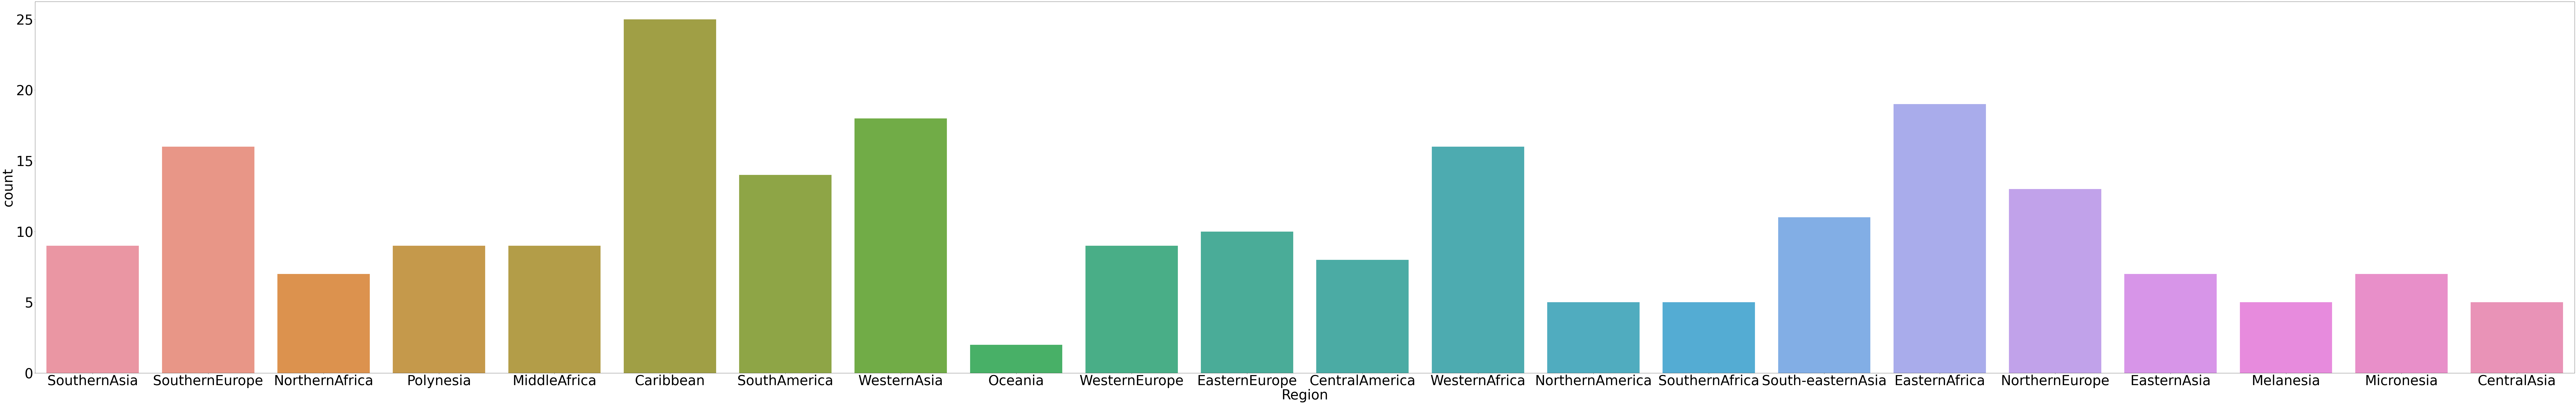

In [ ]:
plt.figure(figsize=(200, 30))
plt.rcParams.update({'font.size': 60})
ax = sns.countplot(x=dfA.loc[:, 'Region'])

plt.show()

##Question 7

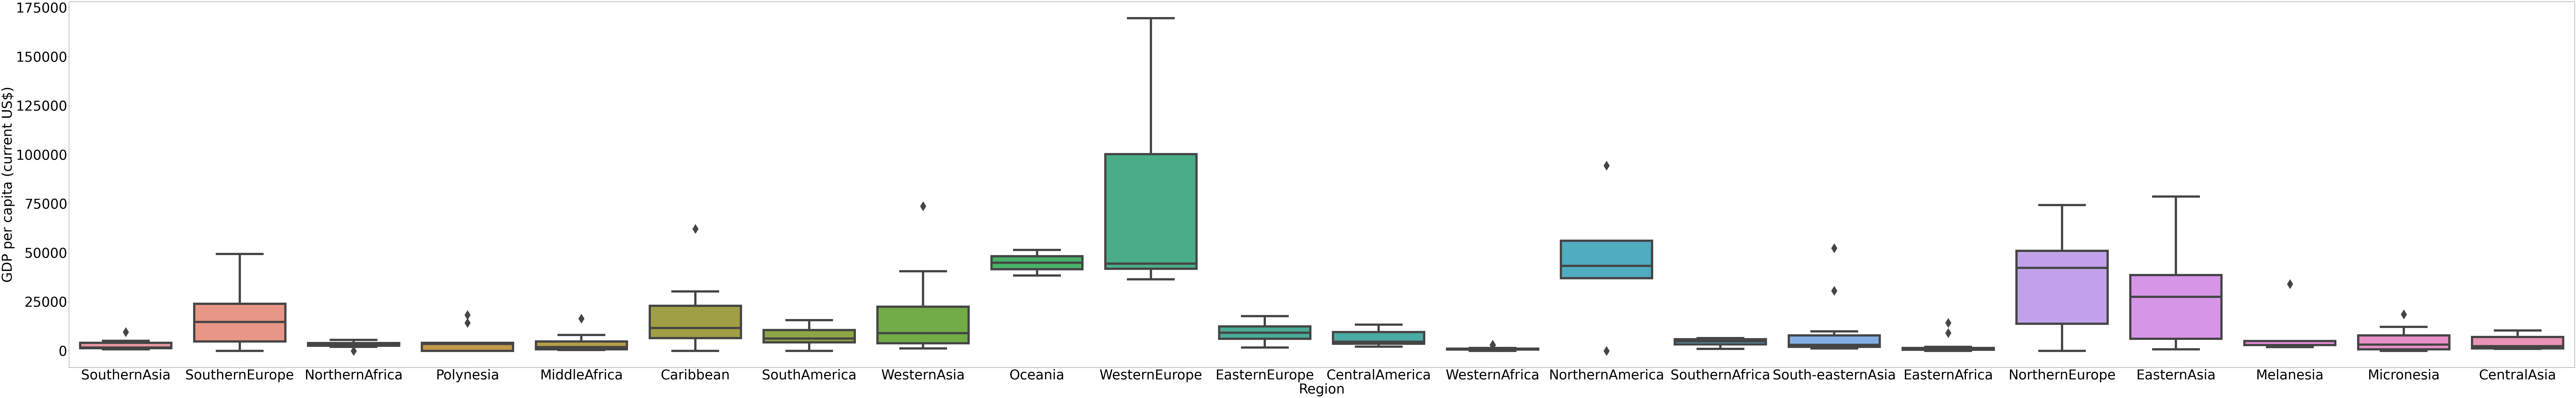

In [ ]:
plt.figure(figsize=(200, 30))
plt.rcParams.update({'font.size': 60})
ax = sns.boxplot(x='Region', y='GDP per capita (current US$)', data=dfA, fliersize=30, linewidth=10)

##Question 8

In [ ]:
#Calculate the inter-quartile range
Q1 = dfA['Population density (per km2, 2017)'].quantile(0.25)
Q3 = dfA['Population density (per km2, 2017)'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
dfB = dfA
dfB = dfB[~( (dfB['Population density (per km2, 2017)'] < (Q1 - 1.5 * IQR)) | (dfB['Population density (per km2, 2017)'] > (Q3 + 1.5 * IQR)) )]
print(dfB)

                       country  ... Net Official Development Assist. received (% of GNI)
0                  Afghanistan  ...                                                -99  
1                      Albania  ...                                                -99  
2                      Algeria  ...                                                -99  
3               American Samoa  ...                                                -99  
4                      Andorra  ...                                                -99  
..                         ...  ...                                                ...  
224  Wallis and Futuna Islands  ...                                                -99  
225             Western Sahara  ...                                                -99  
226                      Yemen  ...                                                -99  
227                     Zambia  ...                                                -99  
228                  

##Question 9

Text(0, 0.5, 'Population density (per km2, 2017)')

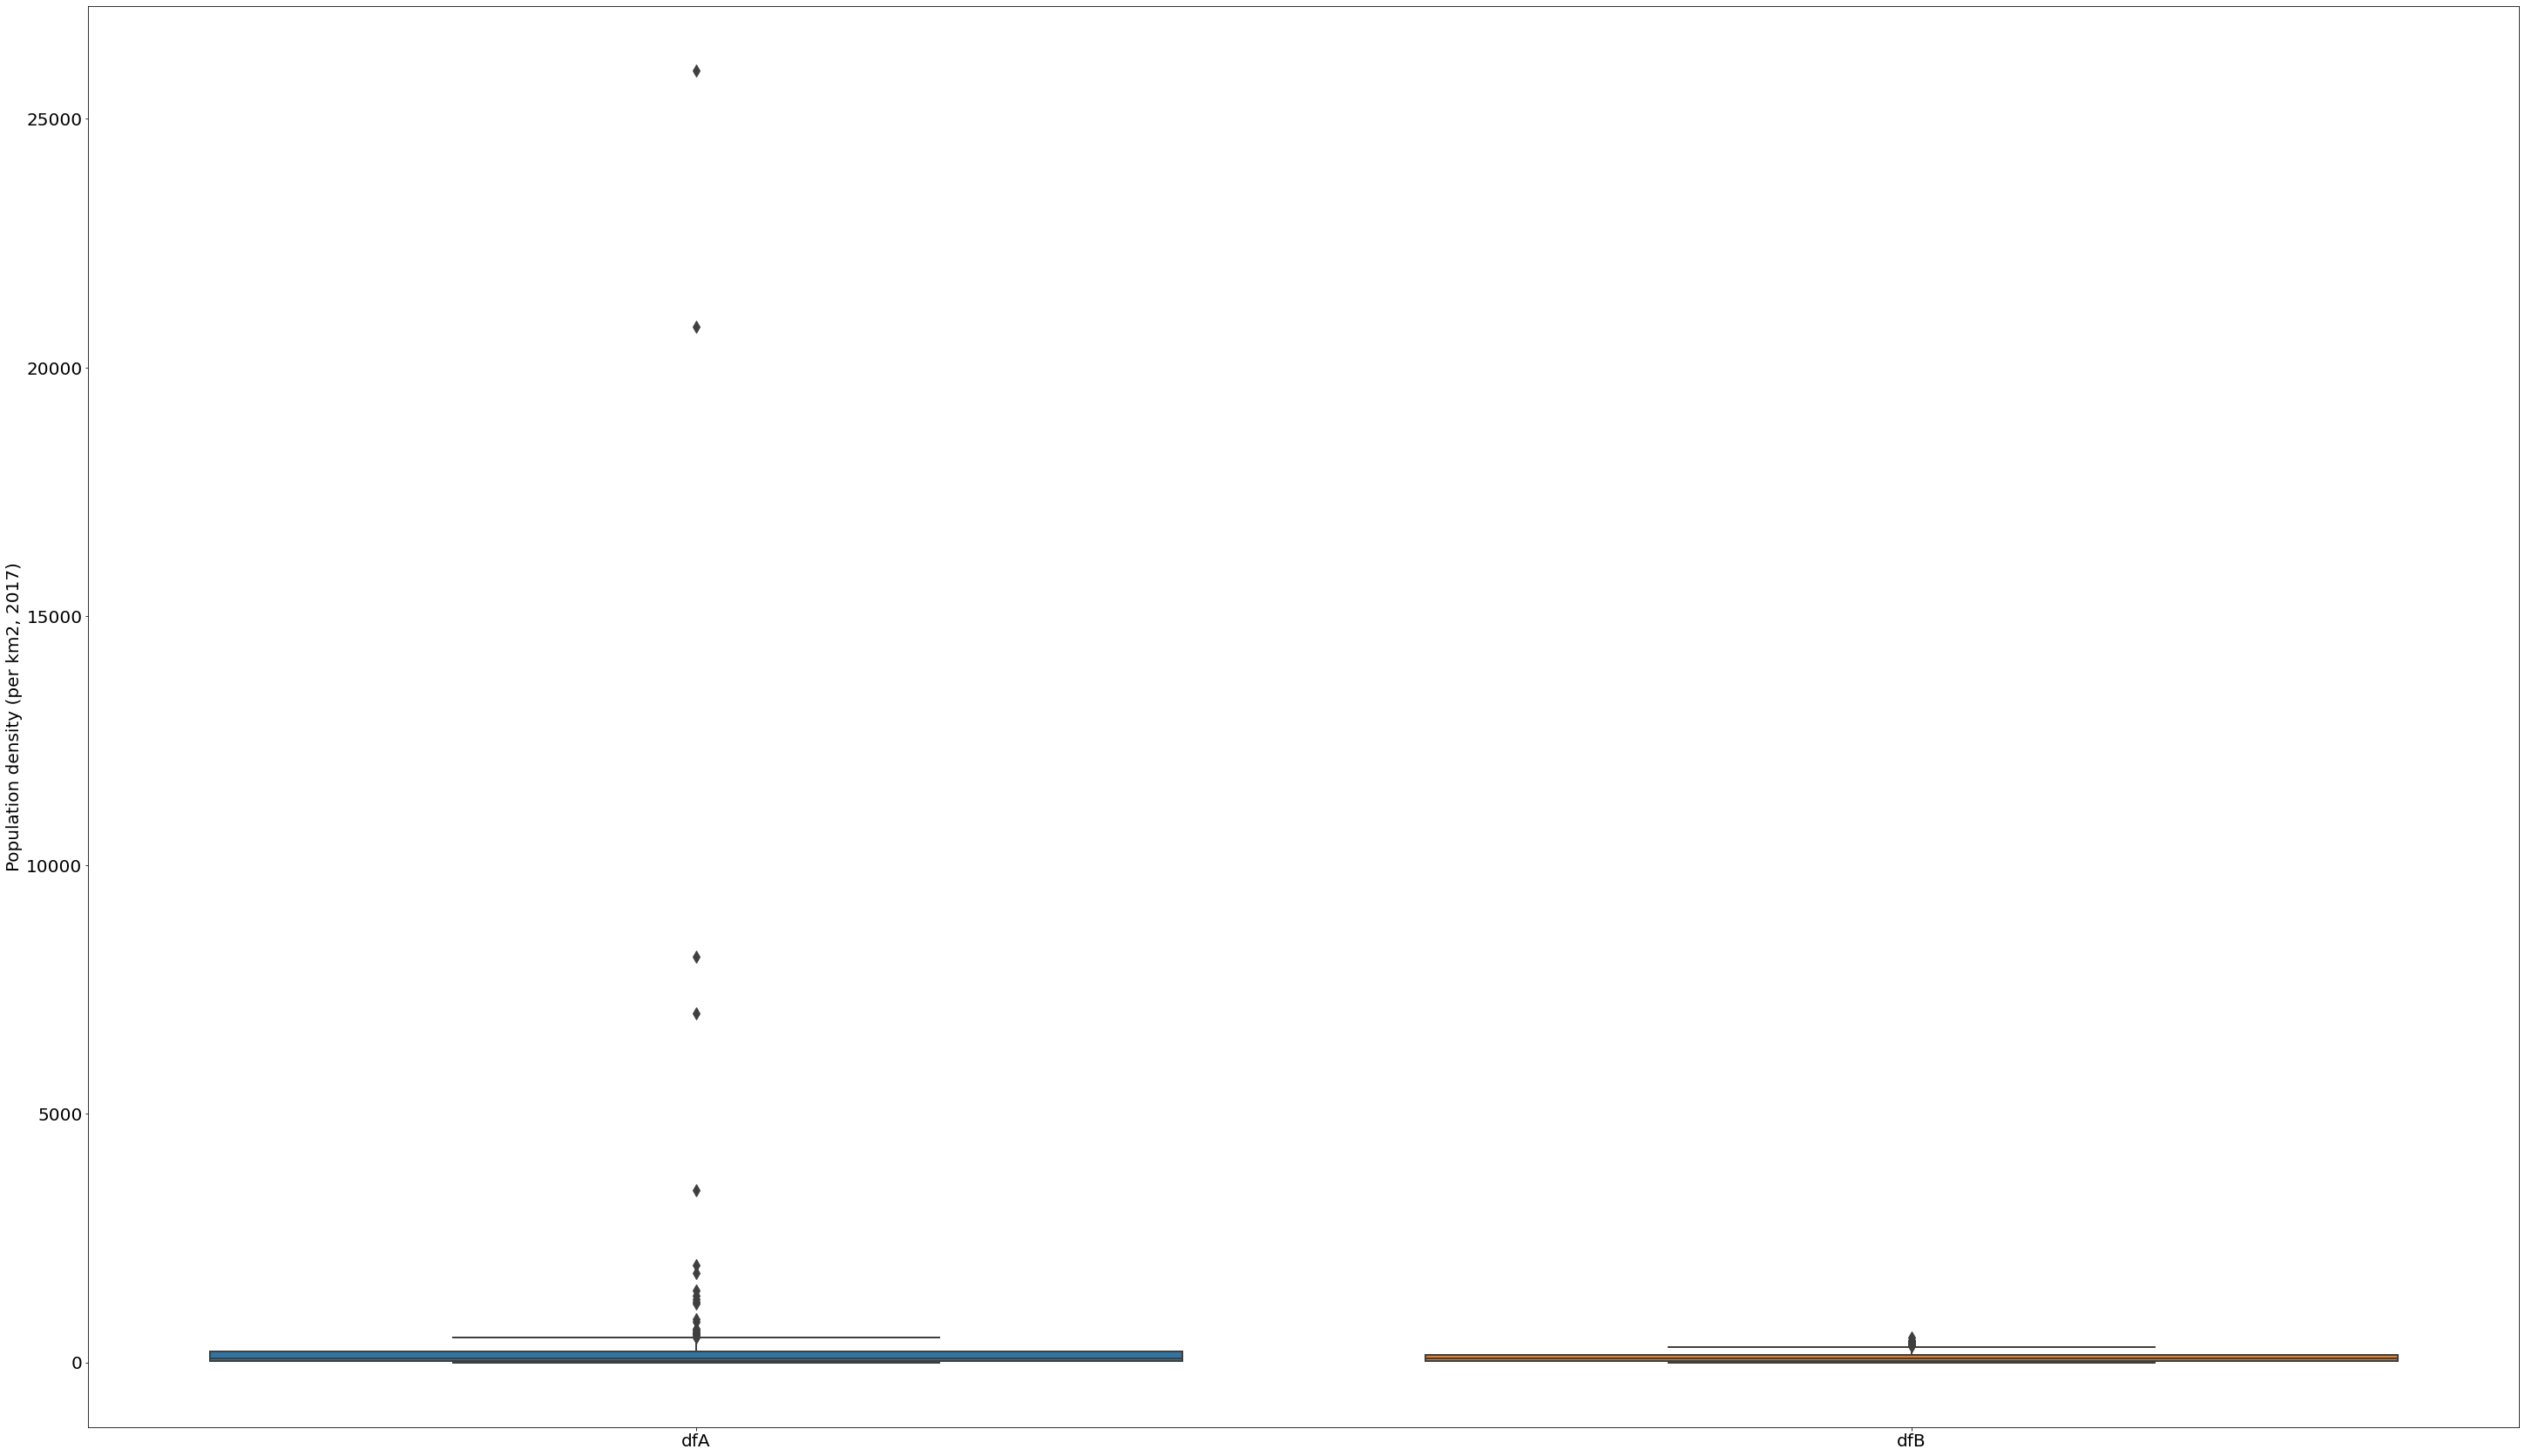

In [ ]:
plt.figure(figsize=(50, 30))
plt.rcParams.update({'font.size': 20})
df_combined = {'dfA': dfA['Population density (per km2, 2017)'], 'dfB': dfB['Population density (per km2, 2017)']}
df_combined = pd.DataFrame(data=df_combined)
ax = sns.boxplot(data=df_combined, fliersize=10, linewidth=2)
ax.set_ylabel('Population density (per km2, 2017)')